<a href="https://colab.research.google.com/github/bvdsb01/Project-Case-Scenario---Coursera/blob/main/Housing%20Agency%20-%20Boston%20Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1: Familiarize with the dataset**

In [78]:
import pandas as pd
import numpy as np

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [6]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


## **Task 2: Generate Descriptive Statistics and Visualizations**

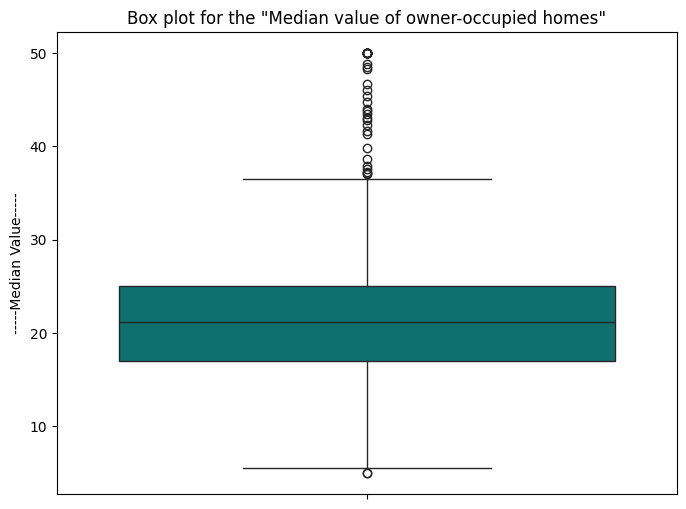

Median = 21.2


In [73]:
# For the "Median value of owner-occupied homes" provide a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

boston = boston_df.copy()

plt.figure(figsize = (8,6))
sns.boxplot(y="MEDV", data = boston, color = 'teal')
plt.title('Box plot for the "Median value of owner-occupied homes"')
plt.ylabel('-----Median Value-----')
plt.show()

print("Median =",boston['MEDV'].median())

Explanation for MEDV Boxplot -

*   Median value is above 20
*   Exact vaue of Median is 21.2
*   There are Outliers on both upper and lower end of the axis.




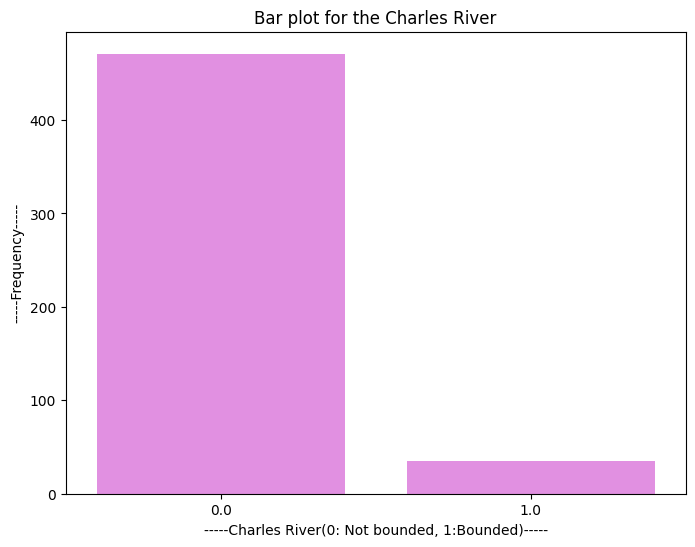

In [75]:
# Provide a  bar plot for the Charles river variable

plt.figure(figsize = (8,6))
sns.countplot(x="CHAS", data = boston, color = 'violet')
plt.title('Bar plot for the Charles River')
plt.xlabel('-----Charles River(0: Not bounded, 1:Bounded)-----')
plt.ylabel('-----Frequency-----')
plt.show()

Explanation for Charles River Bar Plot -

*   0 implies tracts NOT Bound by the river Charles
*   1 implies tracts Bound by the river Charles
*   more than 400 tracts that are not bound by the river
*   less than 100 tracts that are bound by the river


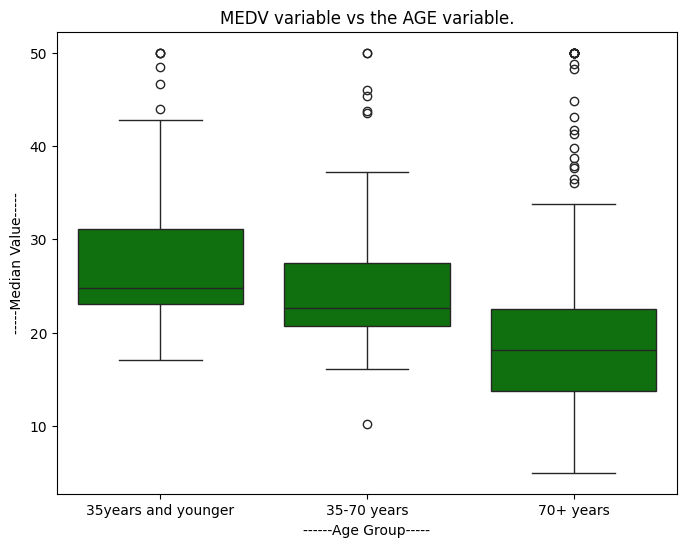

In [72]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston['AGE_GROUP'] = pd.cut(boston['AGE'], bins=[0,35,70,boston['AGE'].max()], labels = ['35years and younger','35-70 years','70+ years'])

plt.figure(figsize = (8,6))
sns.boxplot(x="AGE_GROUP",y="MEDV", data = boston, color = 'green')
plt.title('MEDV variable vs the AGE variable.')
plt.xlabel('------Age Group-----')
plt.ylabel('-----Median Value-----')
plt.show()

Explanation for MEDV Boxplot -
*   Median for 70+ years age group is the lowest
*   Median for 35 years and younger group is the highest
*   Several Outliers for all the three age groups



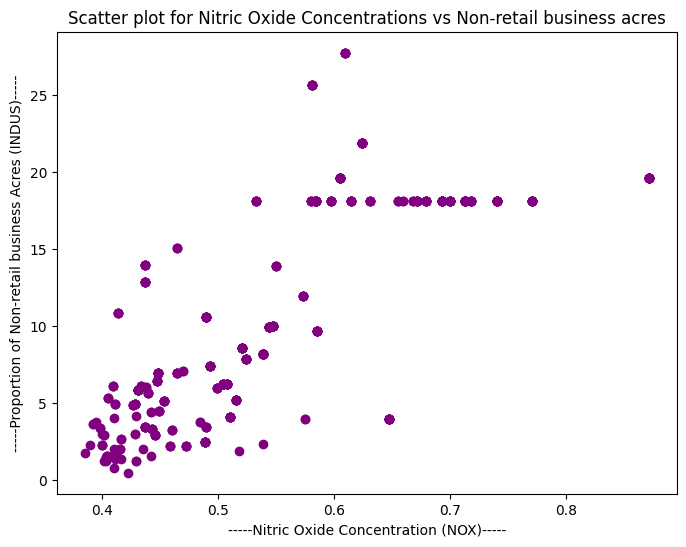

[[1.         0.76365145]
 [0.76365145 1.        ]]


In [79]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize = (8,6))
plt.scatter(boston['NOX'], boston['INDUS'], color = 'purple')
plt.title('Scatter plot for Nitric Oxide Concentrations vs Non-retail business acres')
plt.xlabel('-----Nitric Oxide Concentration (NOX)-----')
plt.ylabel('-----Proportion of Non-retail business Acres (INDUS)-----')
plt.show()

print(np.corrcoef(boston['NOX'], boston['INDUS']))

There is a positive correlation between NOX and INDUS. The lower value of covariance 0.76365145 confirms the positive correlation among the two.

---



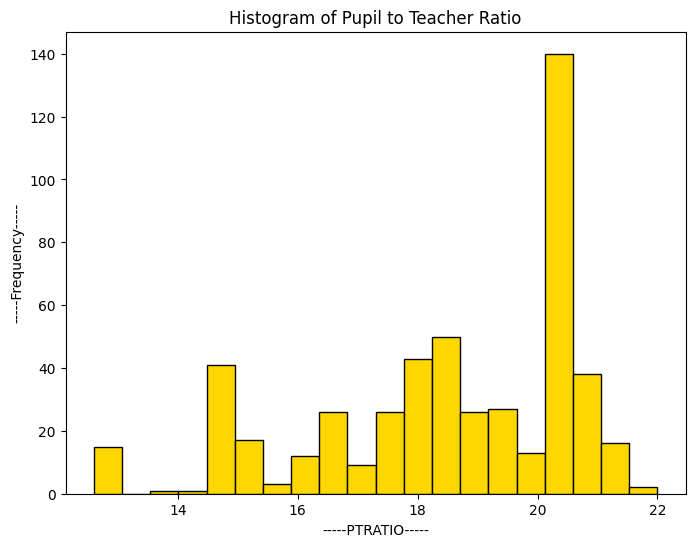

12.6
22.0


In [82]:
# create a histogram for the pupil to teacher ratio variable

plt.figure(figsize = (8,6))
plt.hist(boston['PTRATIO'], bins = 20, edgecolor = 'black', color = 'gold')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('-----PTRATIO-----')
plt.ylabel('-----Frequency-----')
plt.show()

print(boston['PTRATIO'].min())
print(boston['PTRATIO'].max())

The histogram has a range between 12.6 to 22.0.
Count for the value bin (20-20.6) is particulary high.

# **Task 3: Use the appropriate tests to answer the questions provided**


In [51]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

from scipy.stats import ttest_ind
river_bounded = boston[boston['CHAS'] == 1]['MEDV']
not_bounded = boston[boston['CHAS'] == 0]['MEDV']
t_statistics, p_value = ttest_ind(river_bounded, not_bounded)

print("T-statistic",t_statistics)
print("P-value",p_value)

alpha = 0.05
if p_value < alpha:
  print("\nReject Null Hypothesis")
else:
  print("Fail to reject null hypothesis")

T-statistic 3.996437466090509
P-value 7.390623170519905e-05

Reject Null Hypothesis


**Conclusion:** As the p-value is clearly less than the alpha value, we reject the null hypothesis. There is significant difference in the median value of houses that are bound by the Charles River and the median value of houses that are not bound by the Charles River.

In [56]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

from scipy.stats import f_oneway
age_groups = boston['AGE_GROUP'].unique()
data_groups = [boston[boston['AGE_GROUP'] == group]['MEDV'] for group in age_groups]
f_statistics, p_value = f_oneway(*data_groups)

print("F-statistic",f_statistics)
print("P-value",p_value)

alpha = 0.05
if p_value < alpha:
  print("\nReject Null Hypothesis")
else:
  print("Fail to reject null hypothesis")

F-statistic 36.40764999196599
P-value 1.7105011022702984e-15

Reject Null Hypothesis


**Conclusion**: As the p-value is clearly less than the alpha value, we reject the null hypothesis and conclude that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [61]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr
corr_coeff, p_value = pearsonr(boston['NOX'], boston['INDUS'])

print("Correlation Coefficient",corr_coeff)
print("P-value",p_value)

alpha = 0.05
if p_value < alpha:
  print("\nReject Null Hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation Coefficient 0.7636514469209151
P-value 7.913361061239527e-98

Reject Null Hypothesis


**Conclusion**: As the p-value is clearly less than the alpha value, we reject the null hypothesis and conclude that there exists a relationship between NOX and proportion of non-retail business acres per town.

In [66]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm
x = sm.add_constant(boston['DIS'])
y = boston['MEDV']
model = sm.OLS(y, x).fit()

print(model.summary())

alpha = 0.05
p_value = model.pvalues['DIS']
print("P-value", p_value)

if p_value < alpha:
  print("\nReject Null Hypothesis")
else:
  print("Fail to reject null hypothesis")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        17:24:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion**: As the p-value is clearly less than the alpha value, we reject the null hypothesis and conclude that there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.